In [4]:
!pip install pyAgrum==1.8.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.7 MB/s eta 0:00:00


In [5]:
import sys
import os

import numpy as np

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC
from pyAgrum.lib.bn2roc import showPR
from pyAgrum.lib.bn2roc import showROC_PR

SIZE_LEARN=10000
SIZE_VALID=2000


In [6]:

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# login into my google drive account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# main functions are in this file
learning_lib = drive.CreateFile( {'id' : '1wwSN3AIl_dmayKENu5jnc1BRaNPe8BZc'}).GetContentFile("learning.py")

In [10]:
from IPython.core.display import HTML
import numpy as np
import pandas as pd
import random as rn
import time

# import auxiliary functions
from learning import *

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
# path to project folder
# please change to your own
#PATH = "/Users/catarina/Google Drive/Colab Notebooks/DDS/"
PATH = "/content/drive/My Drive/Colab Notebooks/"

In [13]:
# name of dataset
DATASET_NAME = "resilience.csv"

# variable containing the class labels in this case the dataset contains:
# 0 - if not High Risk
# 1 - if High Risk
class_var = "Outcomes"

# load dataset
dataset_path = PATH + "datasets/" + DATASET_NAME
data = pd.read_csv( dataset_path )
data

Health services  Telecommun-ications infrastructure  \
0                 4                                   0   
1                 2                                   2   
2                 1                                   0   
3                 0                                   1   
4                 0                                   2   
5                 4                                   3   
6                 0                                   4   
7                 6                                   1   
8                 7                                   7   
9                 1                                   2   
10                0                                   3   
11                3                                   3   
12                7                                   4   
13                0                                   3   
14                2                                   0   
15                4                                   0   
16                3                                   3   
17                0                                   6   
18                1                                   4   

    Transport infrastructure  Financial/ professional services  Crime  \
0                          1                                 1      3   
1                          4                                 4      6   
2                          7                                 7      3   
3                          0                                 0      7   
4                          0                                 4      1   
5                          3                                 6      7   
6                          3                                 1      0   
7                          6                                 1      5   
8                          4                                 2      7   
9                          4                                 4      6   
10                         2                                 3      2   
11                         6                                 5      1   
12                         1                                 5      1   
13                         3                                 1      2   
14                         6                                 5      5   
15                         1                                 4      7   
16                         6                                 0      4   
17                         5                                 1      7   
18                         7                                 4      4   

    Housing  Self-rated general health  Psychological distress levels  \
0         0                          3                              2   
1         7                          2                              4   
2         2                          3                              4   
3         6                         10                              2   
4         5                         10                              2   
5         4                          4                              2   
6         6                          8                              3   
7         0                          9                              5   
8         1                          4                              4   
9         5                          9                              5   
10        6                          7                              2   
11        2                          5                              1   
12        6                          5                              5   
13        6                          3                              3   
14        7                         10                              1   
15        6                          3                              1   
16        2                          1                              5   
17        5                          9          

In [14]:
learner=gum.BNLearner("/content/drive/My Drive/Colab Notebooks/datasets/resilience.csv")

bn2=learner.useMIIC().learnBN()
currentTime=learner.currentTime()

In [25]:
bn = gum.BayesNet("Resilience")
bn =gum.fastBN("Telecom infrastructure{Very Good|Good|poor}<-Health services{Very Good|Good|Poor}->Resilience{Yes|No}<-Crime{Yes|No};Transport infrastructure{Very Good|Good|Poor}<-Financial Service{Yes|No}<-Crime{Yes|No};Resilience{Yes|No}<-Financial Service{Yes|No}")
print(bn.variable("Resilience"))
print(bn.variable("Health services"))
print(bn.variable("Telecom infrastructure"))
print(bn.variable("Crime"))
print(bn.variable("Transport infrastructure"))
print(bn.variable("Financial Service"))

Resilience:Labelized({Yes|No})
Health services:Labelized({Very Good|Good|Poor})
Telecom infrastructure:Labelized({Very Good|Good|poor})
Crime:Labelized({Yes|No})
Transport infrastructure:Labelized({Very Good|Good|Poor})
Financial Service:Labelized({Yes|No})


In [27]:
bn

(pyAgrum.BayesNet<double>@0x6c6dfa0) BN{nodes: 6, arcs: 6, domainSize: 216, dim: 27, mem: 384o}

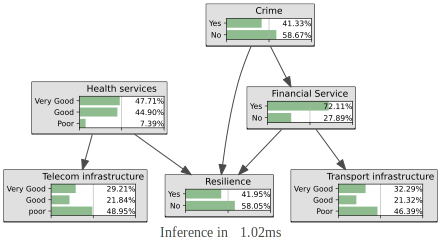

In [26]:


gnb.showInference(bn,size="10")



In [ ]:
template=gum.BayesNet()
template.add(gum.LabelizedVariable("Survived", "Survived", ['False', 'True']))
template.add(gum.RangeVariable("Pclass", "Pclass",1,3))
template.add(gum.LabelizedVariable("Sex", "The passenger's gender",['Female', 'Male']))
template.add(gum.LabelizedVariable("SibSp", "SibSp",['False', 'True']))
template.add(gum.LabelizedVariable("Ticket", "Ticket",['False', 'True']))
template.add(gum.LabelizedVariable("Embarked", "Embarked", ['', 'C', 'Q', 'S']))
template.add(gum.LabelizedVariable("Age", "The passenger's age category", ["baby", "toddler", "kid", "teen", "adult", "old"]))


6

In [ ]:
gnb.showBN(template)

In [ ]:


learner = gum.BNLearner(data,template)
bn = learner.learnBN()

UnknownLabelInDatabase: ignored